# ネットワーク解析の例

In [3]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

###  Figure 2.6に示されているマカク猿の皮質接続行列

ノード数47, エッジは505本

In [4]:
Macaque_cortex = np.array([[0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
                          [1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
                          [1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1],
                          [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,1,1,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1],
                          [1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,1,0],
                          [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                          [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0],
                          [0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0],
                          [0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0],
                          [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1],
                          [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,1,0,1,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0],
                          [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1],
                          [0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1],
                          [0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0]])

# networkxのオブジェクトに変更
G = nx.from_numpy_matrix(Macaque_cortex, create_using=nx.DiGraph())

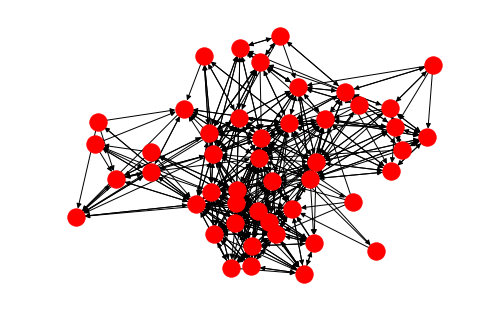

In [5]:
# ネットワークの可視化
nx.draw(G)

### Degree Distributionの計算

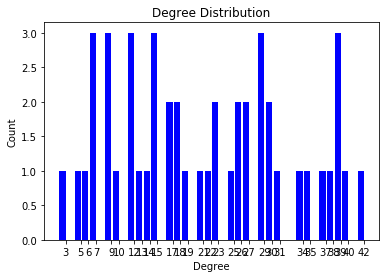

In [6]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=False)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


plt.show()

### Optimal Modularityの計算

採用しているアルゴリズムが違うためか、教科書の結果は再現できず（optimal modularityの個数は3つになった）。

In [7]:
from networkx.algorithms.community import greedy_modularity_communities
G_tmp = nx.from_numpy_matrix(Macaque_cortex)
c = greedy_modularity_communities(G_tmp)

print(c)

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 39, 11, 12, 13, 44, 45, 46, 28, 29}), frozenset({10, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31}), frozenset({32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43})]


In [8]:
argsort = [0,1,2,3,4,5,6,7,8,9,39,11,12,13,44,45,46,28,29,10,14,15,16,17,18,19,20,21,22,23,24,25,26,27,30,31,32,33,34,35,36,37,38,40,41,42,43]
Macaque_cortex_tmp = np.zeros([47,47])
for i in range(47):
    Macaque_cortex_tmp[i] = [Macaque_cortex[i][j] for j in argsort]
Macaque_cortex_rearange = [Macaque_cortex_tmp[i] for i in argsort]

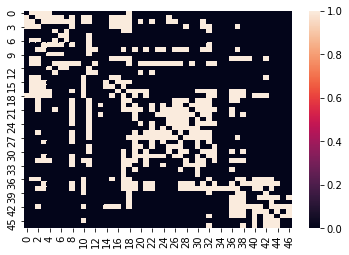

In [9]:
import seaborn as sns
sns.heatmap(Macaque_cortex_rearange)

### Clustering Coefficientの計算

directed graph周りの取り扱い方が若干違う？

In [10]:
# 3bに対応するノードのclustering coefficient
print(nx.clustering(G_tmp)[42])

# グラフ全体のclusteing coefficient 
print(nx.average_clustering(G))

0.7
0.580498292772679


### distance matrixとpath length

4


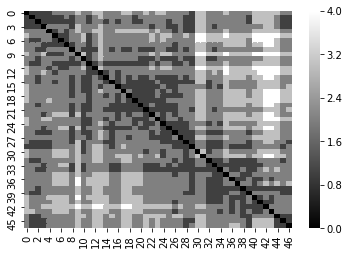

In [11]:
# distance matrix
distance_matrix = nx.floyd_warshall_numpy(G)

sns.heatmap(distance_matrix, cmap='gray')

# graph diameterはdistance matrixの最大値
print(nx.algorithms.distance_measures.diameter(G))

In [12]:
# average shortest path length
print(nx.average_shortest_path_length(G))

2.0541165587419057


### centrality measures

<Container object of 47 artists>

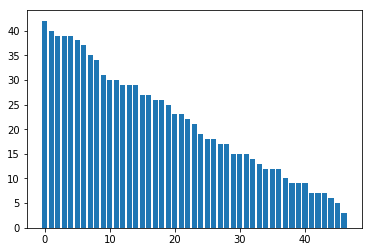

In [13]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.bar(range(47), degree_sequence)

<Container object of 47 artists>

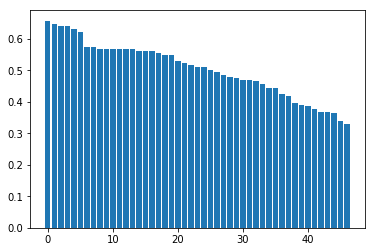

In [14]:
closeness_sequence = sorted([nx.closeness_centrality(G)[key] for key in nx.closeness_centrality(G).keys()], reverse=True)
plt.bar(range(47), closeness_sequence)

# print(nx.closeness_centrality(G))

<Container object of 47 artists>

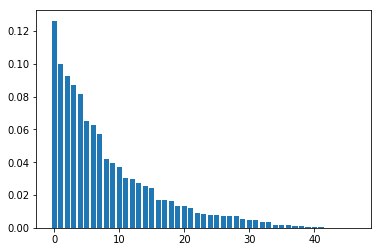

In [15]:
betweenness_sequence = sorted([nx.betweenness_centrality(G)[key] for key in nx.betweenness_centrality(G).keys()], reverse=True)
plt.bar(range(47), betweenness_sequence)